In [34]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [35]:
# device config
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device, torch.cuda.current_device(), torch.cuda.get_device_name(0))

cuda 0 GeForce GTX 1050


In [36]:
# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
epochs = 20
batch_size = 100
learning_rate = 0.001

# MNIST Dataset

In [37]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [38]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

In [39]:
examples = iter(train_loader)
samples, labels = examples.__next__()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


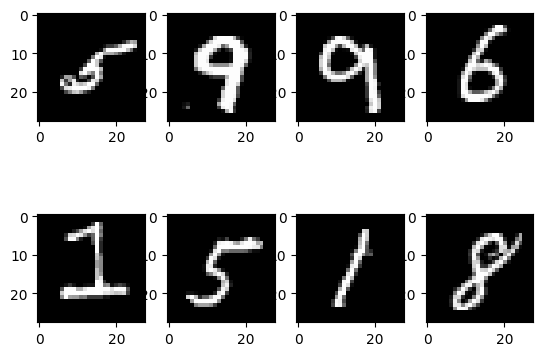

In [40]:
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

# Model

In [41]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

# Training

In [42]:
# model
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# training loop
print('...training started...')
n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # main 5
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 10 == 0:
            print(f'epoch {epoch+1}/{epochs}, step {i+1}/{n_total_steps}: loss = {loss.item():.4f}')

print('...training finished...')

...training started...
epoch 1/20, step 10/600: loss = 1.9530
epoch 1/20, step 20/600: loss = 1.4930
epoch 1/20, step 30/600: loss = 1.0621
epoch 1/20, step 40/600: loss = 0.7993
epoch 1/20, step 50/600: loss = 0.7614
epoch 1/20, step 60/600: loss = 0.6711
epoch 1/20, step 70/600: loss = 0.7362
epoch 1/20, step 80/600: loss = 0.4508
epoch 1/20, step 90/600: loss = 0.4464
epoch 1/20, step 100/600: loss = 0.3771
epoch 1/20, step 110/600: loss = 0.4911
epoch 1/20, step 120/600: loss = 0.3650
epoch 1/20, step 130/600: loss = 0.3616
epoch 1/20, step 140/600: loss = 0.3223
epoch 1/20, step 150/600: loss = 0.3158
epoch 1/20, step 160/600: loss = 0.2907
epoch 1/20, step 170/600: loss = 0.2638
epoch 1/20, step 180/600: loss = 0.2198
epoch 1/20, step 190/600: loss = 0.3827
epoch 1/20, step 200/600: loss = 0.2627
epoch 1/20, step 210/600: loss = 0.5879
epoch 1/20, step 220/600: loss = 0.2021
epoch 1/20, step 230/600: loss = 0.3041
epoch 1/20, step 240/600: loss = 0.2226
epoch 1/20, step 250/600: 

# Testing

In [43]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 784).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the Model: {acc:.2f} %')

Accuracy of the Model: 97.78 %



# Testing Pedictions

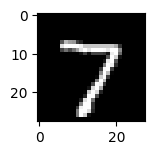

Prediction: 7


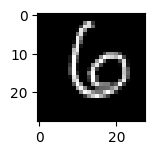

Prediction: 6


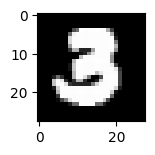

Prediction: 3


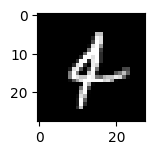

Prediction: 4


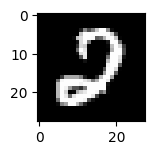

Prediction: 2


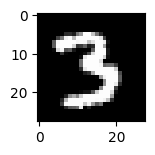

Prediction: 3


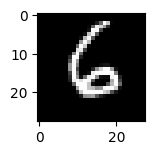

Prediction: 6


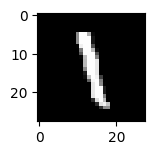

Prediction: 1


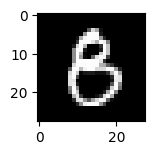

Prediction: 8


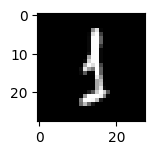

Prediction: 3


In [44]:
i = 9;
with torch.no_grad():
    for images, labels in test_loader:
        plt.subplot(2, 4, 5)
        plt.imshow(images[0][0], cmap='gray')
        plt.show()

        images = images.reshape(-1, 784).to(device)
        labels = labels.to(device)
        outputs = model(images)

        print( 'Prediction:', torch.argmax(torch.softmax(outputs[0], 0)).item() )
        
        if i == 0:
            break;
        else:
            i-=1